In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#패키지 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

# **======== 데이터 전처리 =========**

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
#데이터 분리
target = ["가뭄(MSWSI)", "가뭄(SPI6)"]
X=df.drop(target,axis=1)
y=df[target]
display(X)
display(y)

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2013-01-05,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...
2024-11-30,68.400000,0.358571,1.304057,0.885714,-0.131571
2024-12-07,67.742857,0.373571,0.000000,0.942857,-0.177857
2024-12-14,66.757143,0.388429,0.000000,-2.257143,-0.230429


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


In [ ]:
#train, test 데이터 나누기
test_size = 52#24년 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할

In [ ]:
display(X_train.tail(5))
display(y_train.tail(5))
display(X_test.head(5))
display(y_test.head(5))

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,63.257143,0.381286,0.352557,-1.728571,-0.291000
2023-12-09,61.942857,0.381571,0.847971,2.757143,-0.257857
2023-12-16,70.014286,0.372143,19.862429,1.700000,2.564429
2023-12-23,65.414286,0.397714,0.000000,-10.214286,-2.223857
2023-12-30,63.257143,0.411429,0.285714,-3.371429,0.061000


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2023-12-02,-0.5,0.0
2023-12-09,0.0,0.0
2023-12-16,2.0,1.0
2023-12-23,1.5,1.0
2023-12-30,0.5,1.0


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,63.128571,0.401714,1.267371,-0.700000,0.038000
2024-01-13,62.571429,0.400429,0.000000,-3.842857,-0.048429
2024-01-20,61.828571,0.392143,5.513757,-1.100000,-0.154286
2024-01-27,61.000000,0.405857,0.142857,-8.471429,-0.118571
2024-02-03,60.042857,0.423429,0.276543,-3.000000,-0.167286


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,0.0,1.0
2024-01-13,0.0,0.0
2024-01-20,0.5,0.0
2024-01-27,0.0,0.0
2024-02-03,-0.5,0.0


# **1. SARIMA 모델**
->종속변수1개\
SARIMA (Seasonal Autoregressive Integrated Moving Average) 모델은 ARIMAX와 유사하지만, **계절성**을 추가로 고려할 수 있는 모델입니다. 계절성이 있는 시계열 데이터(예: 매년, 매월 또는 매주 특정 패턴이 반복되는 데이터) 분석에 특히 유용합니다.

SARIMA 모델은 비계절성 부분과 계절성 부분으로 구성되며, 다음과 같이 표현됩니다.

$$(p, d, q)(P, D, Q)_s$$

여기서:
- **비계절성 부분:**
    - **p**: 비계절성 AR 항의 차수
    - **d**: 비계절성 차분 차수
    - **q**: 비계절성 MA 항의 차수
- **계절성 부분:**
    - **P**: 계절성 AR 항의 차수
    - **D**: 계절성 차분 차수
    - **Q**: 계절성 MA 항의 차수
    - **s**: 계절 주기의 길이 (예: 주별 데이터의 경우 s=52, 월별 데이터의 경우 s=12)
비계절 모수 (p, q)

p (AR 차수)
→ PACF 그래프에서 lag가 몇 차까지 뚜렷하게 유의(밴드 밖에 있음)하다가 처음으로 구역안으로 들어온시점-1

q (MA 차수)
→ ACF 그래프에서 lag가 몇 차까지 뚜렷하게 유의하다가처음으로 구역안으로 들어온시점-1

계절 모수 (P, Q)

주기가 s(예: 12개월, 52주 등)라면 s, 2s, 3s … 지점의 ACF/PACF를 본다.

P (계절 AR 차수)
→ PACF에서 lag=s, 2s 지점에 뚜렷한 스파이크가 있으면 P를 1 이상으로 설정.\
lag=1이 강하게 튀고 나머지는 거의 구간 안\
lag=52 근처에서 막대가 신뢰구간을 뚫고 올라오면 → P=1 후보\
PACF가 52에서 거의 0이면 P=0일 수 있음\
Q (계절 MA 차수)\
→ ACF에서 lag=s, 2s 지점에 뚜렷한 스파이크가 있으면 Q를 1 이상으로 설정.\
lag=52에서 막대가 파란 구간을 살짝 벗어나거나 높게 보이면 → Q=1\
만약 52가 뚜렷하게 구간 밖으로 튀어 있으면 Q=1을 고려\
104, 156 … 도 확인 (여기선 52까지만 나와있음)\


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


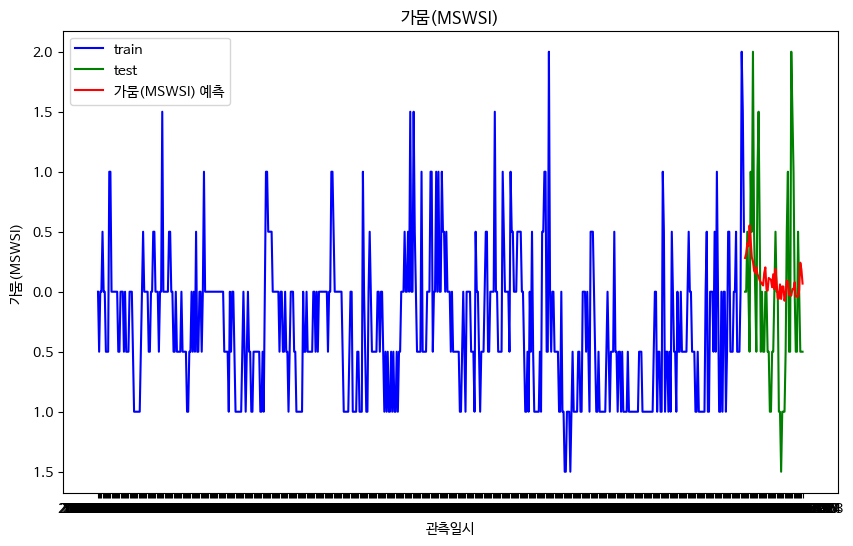

In [ ]:
#사리마모델_MSWSI(차분 없음)
#ACF,PACF시각화 결과 차분전 MSWSI는 p=9~10,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분전 SPI6는 p=14~15,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분후 MSWSI는 p=0~1,q=0가 적정값으로 보임
#ACF,PACF시각화 결과 차분 SPI6는 p=0~1,q=0가 적정값으로 보임
from statsmodels.tsa.statespace.sarimax import SARIMAX
#SARIMAX(trn, order=(p,d(추세제거),q), seasonal_order=(P,D(계절성 제거),Q,s))
sarima_model = SARIMAX(y_train['가뭄(MSWSI)'], order=(10,0,1),seasonal_order=(1,0,1,52)).fit()
pred1 = sarima_model.forecast(steps=len(y_test['가뭄(MSWSI)']))
pred1 = pd.Series(pred1, index=y_test.index, name='관측일시')
# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(y_train['가뭄(MSWSI)'],label='train',color='b')
plt.plot(y_test['가뭄(MSWSI)'],label='test', color='g')
plt.plot(pred1, label='가뭄(MSWSI) 예측', color='r')
plt.legend(loc='best')
plt.title('가뭄(MSWSI)')
plt.xlabel("관측일시"); plt.ylabel("가뭄(MSWSI)")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


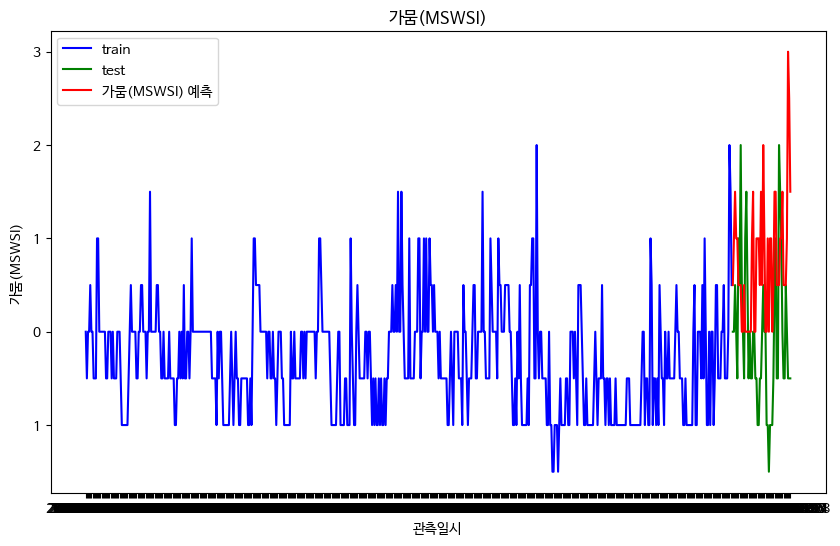

In [ ]:
#사리마모델_MSWSI(계절차분=1)
#ACF,PACF시각화 결과 차분전 MSWSI는 p=9~10,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분전 SPI6는 p=14~15,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분후 MSWSI는 p=0~1,q=0가 적정값으로 보임
#ACF,PACF시각화 결과 차분 SPI6는 p=0~1,q=0가 적정값으로 보임
from statsmodels.tsa.statespace.sarimax import SARIMAX
#SARIMAX(trn, order=(p,d(추세제거),q), seasonal_order=(P,D(계절성 제거),Q,s))
sarima_model = SARIMAX(y_train['가뭄(MSWSI)'], order=(0,1,0),seasonal_order=(0,1,0,52)).fit()
pred1 = sarima_model.forecast(steps=len(y_test['가뭄(MSWSI)']))
pred1 = pd.Series(pred1, index=y_test.index, name='관측일시')
# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(y_train['가뭄(MSWSI)'],label='train',color='b')
plt.plot(y_test['가뭄(MSWSI)'],label='test', color='g')
plt.plot(pred1, label='가뭄(MSWSI) 예측', color='r')
plt.legend(loc='best')
plt.title('가뭄(MSWSI)')
plt.xlabel("관측일시"); plt.ylabel("가뭄(MSWSI)")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


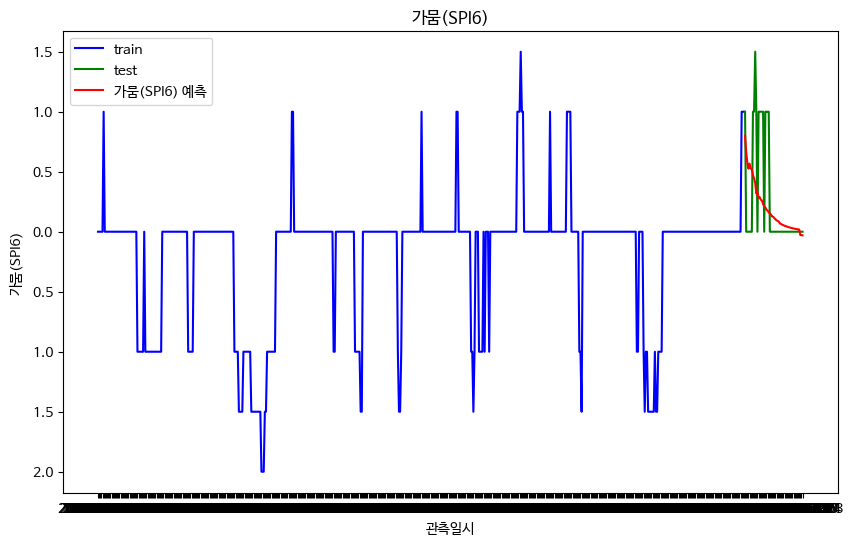

In [ ]:
#사리마모델_SPI6(4차 차분=0)
#ACF,PACF시각화 결과 차분전 MSWSI는 p=9~10,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분전 SPI6는 p=14~15,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분후 MSWSI는 p=0~1,q=0가 적정값으로 보임
#ACF,PACF시각화 결과 차분 SPI6는 p=0~1,q=0가 적정값으로 보임
from statsmodels.tsa.statespace.sarimax import SARIMAX
#SARIMAX(trn, order=(p,d(추세제거),q), seasonal_order=(P,D(계절성 제거),Q,s))
sarima_model = SARIMAX(y_train['가뭄(SPI6)'], order=(14,0,1),seasonal_order=(1,0,1,52)).fit()
pred1 = sarima_model.forecast(steps=len(y_test['가뭄(SPI6)']))
pred1 = pd.Series(pred1, index=y_test.index, name='관측일시')
# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(y_train['가뭄(SPI6)'],label='train',color='b')
plt.plot(y_test['가뭄(SPI6)'],label='test', color='g')
plt.plot(pred1, label='가뭄(SPI6) 예측', color='r')
plt.legend(loc='best')
plt.title('가뭄(SPI6)')
plt.xlabel("관측일시"); plt.ylabel("가뭄(SPI6)")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


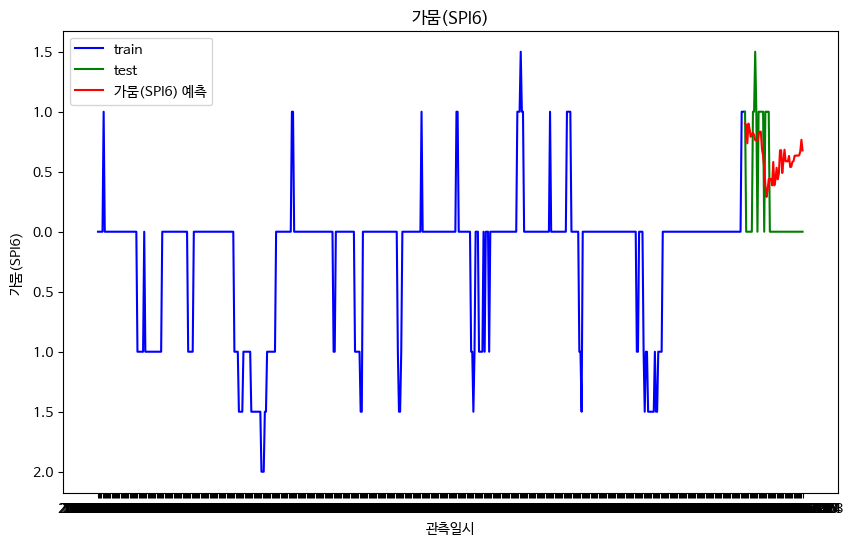

In [ ]:
#사리마모델_SPI6(4차 차분=1)
#ACF,PACF시각화 결과 차분전 MSWSI는 p=9~10,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분전 SPI6는 p=14~15,q=1가 적정값으로 보임
#ACF,PACF시각화 결과 차분후 MSWSI는 p=0~1,q=0가 적정값으로 보임
#ACF,PACF시각화 결과 차분 SPI6는 p=0~1,q=0가 적정값으로 보임
from statsmodels.tsa.statespace.sarimax import SARIMAX
#SARIMAX(trn, order=(p,d(추세제거),q), seasonal_order=(P,D(계절성 제거),Q,s))
sarima_model = SARIMAX(y_train['가뭄(SPI6)'], order=(14,1,1),seasonal_order=(1,1,1,52)).fit()
pred1 = sarima_model.forecast(steps=len(y_test['가뭄(SPI6)']))
pred1 = pd.Series(pred1, index=y_test.index, name='관측일시')
# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(y_train['가뭄(SPI6)'],label='train',color='b')
plt.plot(y_test['가뭄(SPI6)'], label='test',color='g')
plt.plot(pred1, label='가뭄(SPI6) 예측', color='r')
plt.legend(loc='best')
plt.title('가뭄(SPI6)')
plt.xlabel("관측일시"); plt.ylabel("가뭄(SPI6)")
plt.show()

# 2.**SARIMAX 모델**
->종속변수1개, 독립변수\
만약 SARIMA 모델에 외생 변수를 추가하고 싶다면 SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous variables) 모델을 사용합니다. 이는 ARIMAX 모델의 계절성 확장 버전입니다.

$$(p, d, q)(P, D, Q)_s + X$$

여기서 X는 외생 변수입니다. 이전 분석에서 계절성(period=52)이 확인되었으므로, SARIMA 또는 SARIMAX 모델을 사용하여 계절성을 모델링하는 것을 고려할 수 있습니다.

In [ ]:
#SARIMAX(종속_MSWSI,독립변수)_시도1
# SARIMAX 모델 구현, 예측 및 시각화 (ADF 검정 결과에 따라 정상성 O => d=0 및 D=0)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# SARIMAX 모델 파라미터 설정
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 52)

# '가뭄(MSWSI)'에 대한 SARIMAX 모델 적합
model_mswsi_sarimax = sm.tsa.statespace.SARIMAX(y_train['가뭄(MSWSI)'], exog=X_train, order=order, seasonal_order=seasonal_order)
results_mswsi_sarimax = model_mswsi_sarimax.fit()
print("가뭄(MSWSI) SARIMAX 모델 요약:")
print(results_mswsi_sarimax.summary())

# '가뭄(SPI6)'에 대한 SARIMAX 모델 적합
model_spi6_sarimax = sm.tsa.statespace.SARIMAX(y_train['가뭄(SPI6)'], exog=X_train, order=order, seasonal_order=seasonal_order)
results_spi6_sarimax = model_spi6_sarimax.fit()
print("\n가뭄(SPI6) SARIMAX 모델 요약:")
print(results_spi6_sarimax.summary())

# test 데이터에 대한 예측
forecast_mswsi = results_mswsi_sarimax.forecast(steps=len(X_test), exog=X_test)
forecast_spi6 = results_spi6_sarimax.forecast(steps=len(X_test), exog=X_test)


# 모델 적합 결과 및 예측 시각화
plt.figure(figsize=(12, 10))

# 가뭄(MSWSI) 시각화
plt.subplot(2, 1, 1)
plt.plot(pd.to_datetime(y_train['가뭄(MSWSI)'].index), y_train['가뭄(MSWSI)'], label='Actual Train')
plt.plot(pd.to_datetime(y_test['가뭄(MSWSI)'].index), y_test['가뭄(MSWSI)'], label='Actual Test')
plt.plot(pd.to_datetime(results_mswsi_sarimax.fittedvalues.index), results_mswsi_sarimax.fittedvalues, color='red', linestyle='--', label='SARIMAX Fit')
plt.plot(pd.to_datetime(forecast_mswsi.index), forecast_mswsi, color='green', label='SARIMAX Forecast')
plt.title('가뭄(MSWSI) SARIMAX 모델 적합 및 예측 결과 (Order: {}, Seasonal Order: {})'.format(order, seasonal_order))
plt.xlabel('관측일시')
plt.ylabel('가뭄(MSWSI)')
plt.legend()

# 가뭄(SPI6) 시각화
plt.subplot(2, 1, 2)
plt.plot(pd.to_datetime(y_train['가뭄(SPI6)'].index), y_train['가뭄(SPI6)'], label='Actual Train')
plt.plot(pd.to_datetime(y_test['가뭄(SPI6)'].index), y_test['가뭄(SPI6)'], label='Actual Test')
plt.plot(pd.to_datetime(results_spi6_sarimax.fittedvalues.index), results_spi6_sarimax.fittedvalues, color='red', linestyle='--', label='SARIMAX Fit')
plt.plot(pd.to_datetime(forecast_spi6.index), forecast_spi6, color='green', label='SARIMAX Forecast')
plt.title('가뭄(SPI6) SARIMAX 모델 적합 및 예측 결과 (Order: {}, Seasonal Order: {})'.format(order, seasonal_order))
plt.xlabel('관측일시')
plt.ylabel('가뭄(SPI6)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#SARIMAX(종속1_MSWSI,독립변수)_시도2(차분-1)
# SARIMAX 모델 구현, 예측 및 시각화 (d=1, D=1로 설정)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# SARIMAX 모델 파라미터 설정
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 52)

# '가뭄(MSWSI)'에 대한 SARIMAX 모델 적합
model_mswsi_sarimax = sm.tsa.statespace.SARIMAX(y_train['가뭄(MSWSI)'], exog=X_train, order=order, seasonal_order=seasonal_order)
results_mswsi_sarimax = model_mswsi_sarimax.fit()
print("가뭄(MSWSI) SARIMAX 모델 요약:")
print(results_mswsi_sarimax.summary())

# '가뭄(SPI6)'에 대한 SARIMAX 모델 적합
model_spi6_sarimax = sm.tsa.statespace.SARIMAX(y_train['가뭄(SPI6)'], exog=X_train, order=order, seasonal_order=seasonal_order)
results_spi6_sarimax = model_spi6_sarimax.fit()
print("\n가뭄(SPI6) SARIMAX 모델 요약:")
print(results_spi6_sarimax.summary())

# test 데이터에 대한 예측
forecast_mswsi = results_mswsi_sarimax.forecast(steps=len(X_test), exog=X_test)
forecast_spi6 = results_spi6_sarimax.forecast(steps=len(X_test), exog=X_test)


# 모델 적합 결과 및 예측 시각화
plt.figure(figsize=(12, 10))

# 가뭄(MSWSI) 시각화
plt.subplot(2, 1, 1)
plt.plot(pd.to_datetime(y_train['가뭄(MSWSI)'].index), y_train['가뭄(MSWSI)'], label='Actual Train')
plt.plot(pd.to_datetime(y_test['가뭄(MSWSI)'].index), y_test['가뭄(MSWSI)'], label='Actual Test')
plt.plot(pd.to_datetime(results_mswsi_sarimax.fittedvalues.index), results_mswsi_sarimax.fittedvalues, color='red', linestyle='--', label='SARIMAX Fit')
plt.plot(pd.to_datetime(forecast_mswsi.index), forecast_mswsi, color='green', label='SARIMAX Forecast')
plt.title('가뭄(MSWSI) SARIMAX 모델 적합 및 예측 결과 (Order: {}, Seasonal Order: {})'.format(order, seasonal_order))
plt.xlabel('관측일시')
plt.ylabel('가뭄(MSWSI)')
plt.legend()

# 가뭄(SPI6) 시각화
plt.subplot(2, 1, 2)
plt.plot(pd.to_datetime(y_train['가뭄(SPI6)'].index), y_train['가뭄(SPI6)'], label='Actual Train')
plt.plot(pd.to_datetime(y_test['가뭄(SPI6)'].index), y_test['가뭄(SPI6)'], label='Actual Test')
plt.plot(pd.to_datetime(results_spi6_sarimax.fittedvalues.index), results_spi6_sarimax.fittedvalues, color='red', linestyle='--', label='SARIMAX Fit')
plt.plot(pd.to_datetime(forecast_spi6.index), forecast_spi6, color='green', label='SARIMAX Forecast')
plt.title('가뭄(SPI6) SARIMAX 모델 적합 및 예측 결과 (Order: {}, Seasonal Order: {})'.format(order, seasonal_order))
plt.xlabel('관측일시')
plt.ylabel('가뭄(SPI6)')
plt.legend()

plt.tight_layout()
plt.show()

# 3.**VAR 모델**
종속변수n개(서로의 영양까지 확인가능)

In [ ]:
#VAR모델의 p값 결정을 위한 p값 탐색
from statsmodels.tsa.api import VAR

y = y.asfreq('W-SAT')# 토요일 기준으로 주기 정보를 고정
model = VAR(y_train)
ic = model.select_order(maxlags=12)  # 0~12주로 범위잡아서 p값 탐색
print(ic.summary())                  # aic, bic 등 확인
p = ic.selected_orders['aic'] or ic.selected_orders['bic']  # 하나 선택
print(f'최적의 p값={p}')

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -2.470      -2.455     0.08454      -2.464
1       -4.066     -4.019*     0.01715      -4.048
2       -4.081      -4.004     0.01689     -4.051*
3       -4.089      -3.982     0.01675      -4.047
4       -4.090      -3.951     0.01674      -4.036
5       -4.090      -3.920     0.01674      -4.024
6       -4.084      -3.883     0.01685      -4.005
7       -4.088      -3.857     0.01677      -3.998
8      -4.091*      -3.829    0.01673*      -3.988
9       -4.088      -3.795     0.01677      -3.974
10      -4.078      -3.754     0.01694      -3.951
11      -4.067      -3.713     0.01712      -3.929
12      -4.059      -3.673     0.01727      -3.908
--------------------------------------------------
최적의 p값=8


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


AIC (Akaike Information Criterion): 값이 낮을수록 좋은 모델,더 많은 lag(복잡한 모델)를 고르는 경향이 있음.

BIC (Bayesian Information Criterion): 값이 낮을수록 좋은 모델, 단순한 모델 선호

FPE (Final Prediction Error): 예측 오차 추정치, 낮을수록 좋음,평균 제곱 오차(MSE)와 비슷한 해석.

HQIC (Hannan-Quinn): AIC와 BIC의 중간

최적 지연 차수(p) 선택
과거 몇 시점까지 설명변수로 넣을지. p가 너무 작으면 언더핏, 너무 크면 오버핏/불안정.
→ select_order는 통계적 기준(AIC/BIC 등)으로 합리적인 p를 자동으로 제안

AIC: 예측력(적합) 중시, 비교적 관대 (더 큰 p를 고르기 쉬움)
BIC: 모형 단순성 중시, 비교적 보수적 (더 작은 p를 고르기 쉬움)

In [ ]:
#VAR모델 종속변수끼리 영향 확인
# SPI6 → MSWSI
res = VAR(y_train).fit(8)
gc1 = res.test_causality('가뭄(MSWSI)', ['가뭄(SPI6)'], kind='f')  # 귀무: SPI6이 MSWSI에 인과성 여부
print(gc1.summary())

# MSWSI → SPI6
gc2 = res.test_causality('가뭄(SPI6)', ['가뭄(MSWSI)'], kind='f')  # 귀무: MSWSI가 SPI6에 인과성 여부
print(gc2.summary())


Granger causality F-test. H_0: 가뭄(SPI6) does not Granger-cause 가뭄(MSWSI). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         2.278          1.947   0.020 (8, 1098)
-----------------------------------------------
Granger causality F-test. H_0: 가뭄(MSWSI) does not Granger-cause 가뭄(SPI6). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         2.064          1.947   0.037 (8, 1098)
-----------------------------------------------


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


두 지수 간 예측적 상호작용(양방향 Granger-causality) 이 관측됐다.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


=== VAR(8) 성능 ===
가뭄(MSWSI): MAE=0.5848, RMSE=0.7959
가뭄(SPI6): MAE=0.3553, RMSE=0.4748


/tmp/ipython-input-2142458177.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.xlabel("Date"); plt.legend(); plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


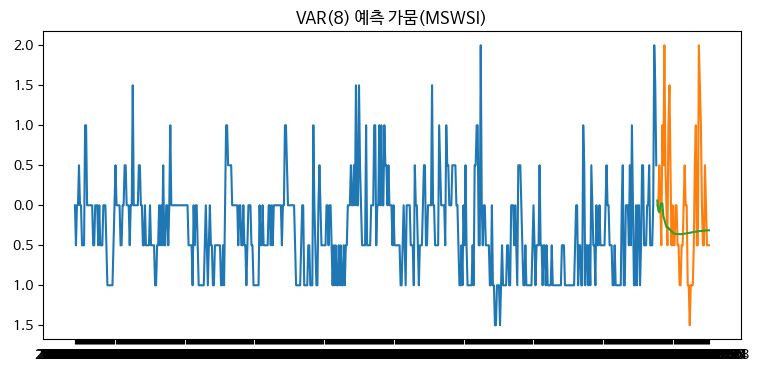

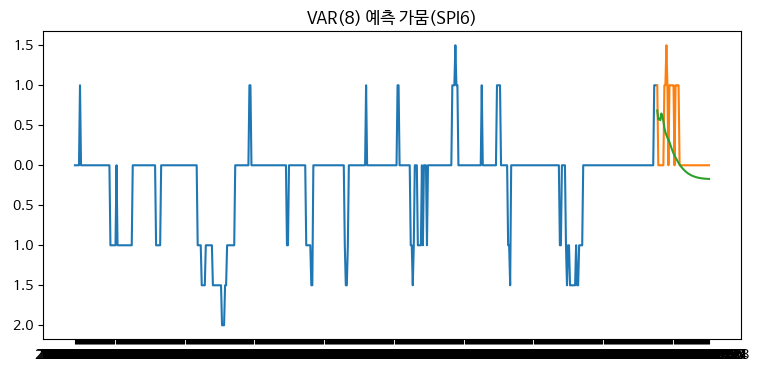

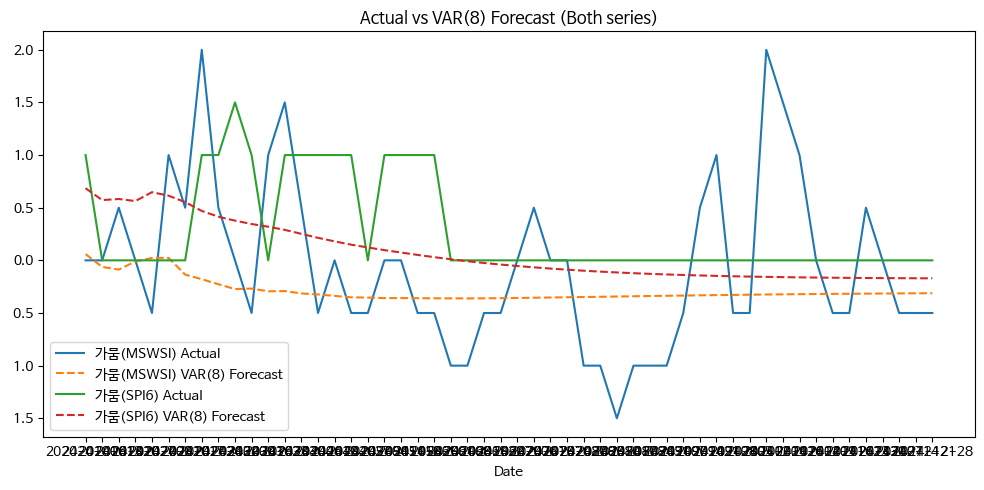

In [ ]:
#VAR모델 최고성능 p값 시각화_차분0일때
# VAR(8)
p = 8
model = VAR(y_train)
res = model.fit(p)

# 테스트 구간 예측
h = len(y_test)
fc = res.forecast(y=y_train.values[-p:], steps=h)                    # 예측값
pred = pd.DataFrame(fc, index=y_test.index, columns=y_test.columns)

# 성능지표
metrics = {}
for col in y_test.columns:
    mae = mean_absolute_error(y_test[col], pred[col])
    mse = mean_squared_error(y_test[col], pred[col])  # MSE만 계산
    rmse = float(np.sqrt(mse))                        # 제곱근으로 RMSE
    metrics[col] = {"MAE": mae, "RMSE": rmse}
# 성능 출력
print("=== VAR(8) 성능 ===")
for col, m in metrics.items():
    print(f"{col}: MAE={m['MAE']:.4f}, RMSE={m['RMSE']:.4f}")

# 시각화: 실제 vs 예측(종속변수별)
for col in y_test.columns:
    plt.figure(figsize=(9,4))
    plt.plot(y_train[col])
    plt.plot(y_test[col])
    plt.title(f"VAR(8) 예측 {col}")
    plt.plot(pred[col], label="Forecast (VAR(8))")

# 두 변수 함께 비교하는 합쳐진 플롯
plt.figure(figsize=(10,5))
for col in y_test.columns:
    plt.plot(y_test.index, y_test[col],       linestyle='-',  label=f"{col} Actual")
    plt.plot(pred.index,   pred[col],         linestyle='--', label=f"{col} VAR(8) Forecast")
plt.title("Actual vs VAR(8) Forecast (Both series)")
plt.xlabel("Date"); plt.legend(); plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3876735942.py:37: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.xlabel("Date"); plt.legend(); plt.tight_layout()


=== VAR(8) 성능 ===
가뭄(MSWSI): MAE=0.6158, RMSE=0.8317
가뭄(SPI6): MAE=0.4182, RMSE=0.5754


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


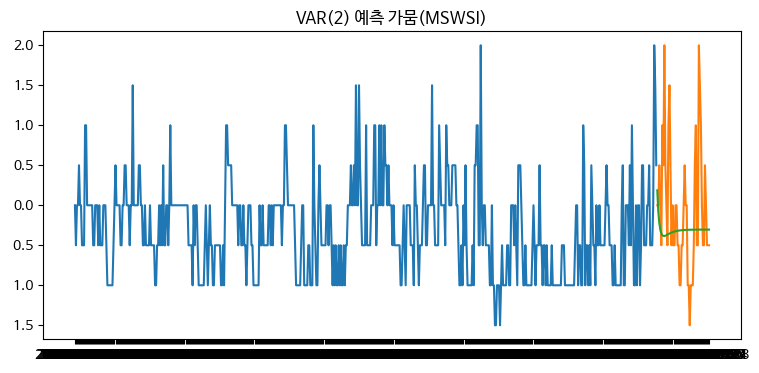

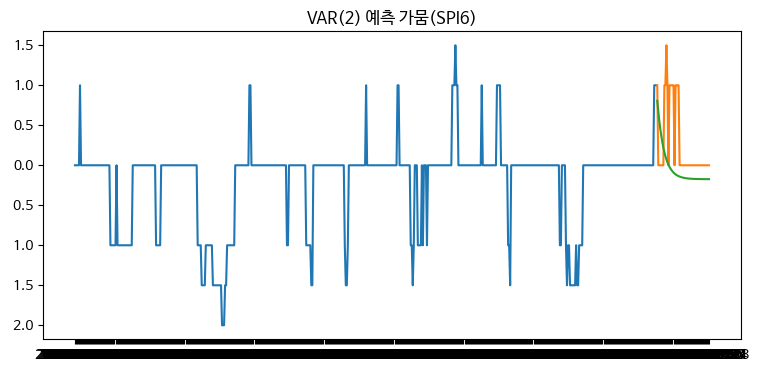

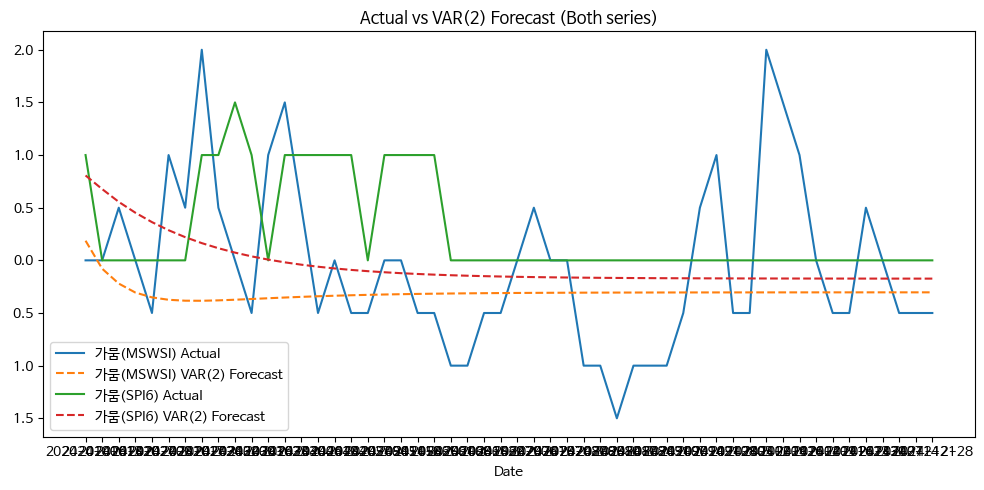

In [ ]:
#VAR모델 p=2 시각화_차분0일때
# VAR(2)
p = 2
model = VAR(y_train)
res = model.fit(p)

# 테스트 구간 예측
h = len(y_test)
fc = res.forecast(y=y_train.values[-p:], steps=h)                    # 예측값
pred = pd.DataFrame(fc, index=y_test.index, columns=y_test.columns)

# 3) 성능지표
metrics = {}
for col in y_test.columns:
    mae = mean_absolute_error(y_test[col], pred[col])
    mse = mean_squared_error(y_test[col], pred[col])  # MSE만 계산
    rmse = float(np.sqrt(mse))                        # 제곱근으로 RMSE
    metrics[col] = {"MAE": mae, "RMSE": rmse}
# 성능 출력
print("=== VAR(8) 성능 ===")
for col, m in metrics.items():
    print(f"{col}: MAE={m['MAE']:.4f}, RMSE={m['RMSE']:.4f}")

# 시각화: 실제 vs 예측 (변수별로 한 장씩)
for col in y_test.columns:
    plt.figure(figsize=(9,4))
    plt.plot(y_train[col])
    plt.plot(y_test[col])
    plt.title(f"VAR(2) 예측 {col}")
    plt.plot(pred[col], label="Forecast (VAR(2))")

# 두 변수 함께 비교하는 합쳐진 플롯
plt.figure(figsize=(10,5))
for col in y_test.columns:
    plt.plot(y_test.index, y_test[col],       linestyle='-',  label=f"{col} Actual")
    plt.plot(pred.index,   pred[col],         linestyle='--', label=f"{col} VAR(2) Forecast")
plt.title("Actual vs VAR(2) Forecast (Both series)")
plt.xlabel("Date"); plt.legend(); plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                MAE      RMSE
가뭄(MSWSI)  0.801488  0.939068
가뭄(SPI6)   0.627892  0.661250


/tmp/ipython-input-585040292.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.xlabel("Date"); plt.legend(); plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


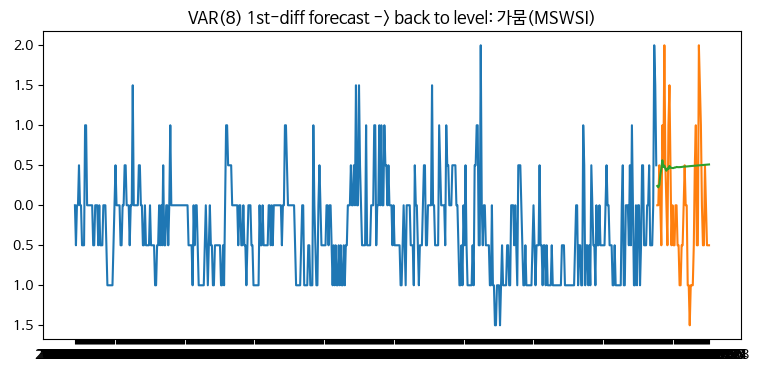

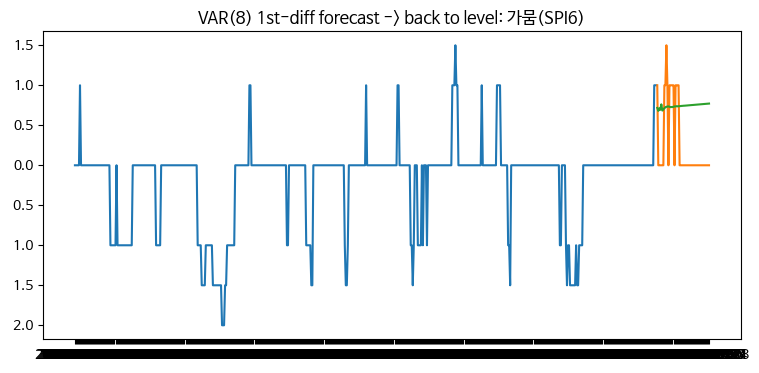

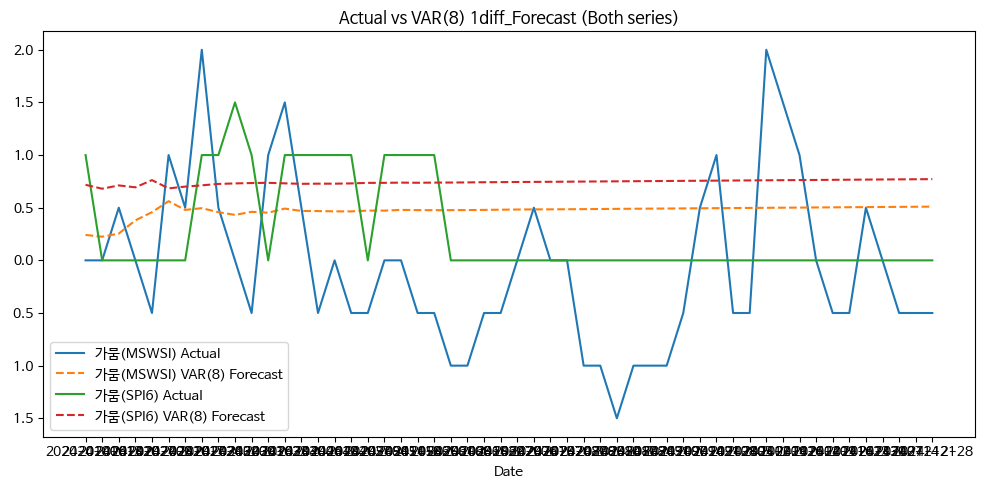

In [ ]:
#VAR모델 p=8 시각화_차분1일때
# 하이퍼파라미터
p = 8
h = len(y_test)                 # 예측 스텝

# 1차 차분
ytr_d = y_train.diff().dropna()  # 1차 차분
last_level = y_train.iloc[-1]    # 복원에 사용할 마지막 레벨값(벡터)

# 적합 (차분 데이터에 VAR)
res = VAR(ytr_d).fit(p)

# 차분 단위로 h-step 예측
fc_d = res.forecast(ytr_d.values[-p:], steps=h)
pred_d = pd.DataFrame(fc_d, index=y_test.index, columns=y_test.columns)

# 역변환(레벨 복원)
# 누적합으로 차분값을 적분하고, 마지막 관측 레벨을 더해줌
pred = pred_d.cumsum().add(last_level, axis=1)

# 성능지표
metrics = {}
for col in y_test.columns:
    mae  = mean_absolute_error(y_test[col], pred[col])
    mse  = mean_squared_error(y_test[col], pred[col])
    rmse = float(np.sqrt(mse))
    metrics[col] = {"MAE": mae, "RMSE": rmse}
print(pd.DataFrame(metrics).T)

# 시각화
for col in y_test.columns:
    plt.figure(figsize=(9,4))
    plt.plot(y_train[col])
    plt.plot(y_test[col])
    plt.plot(pred[col])
    plt.title(f"VAR(8) 1st-diff forecast -> back to level: {col}")

# 두 변수 함께 비교하는 합쳐진 플롯
plt.figure(figsize=(10,5))
for col in y_test.columns:
    plt.plot(y_test.index, y_test[col],       linestyle='-',  label=f"{col} Actual")
    plt.plot(pred.index,   pred[col],         linestyle='--', label=f"{col} VAR(8) Forecast")
plt.title("Actual vs VAR(8) 1diff_Forecast (Both series)")
plt.xlabel("Date"); plt.legend(); plt.tight_layout()
plt.show()




/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-551490240.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.xlabel("Date"); plt.legend(); plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


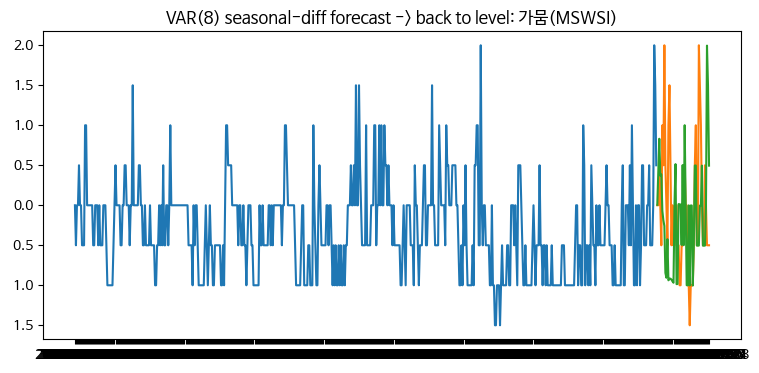

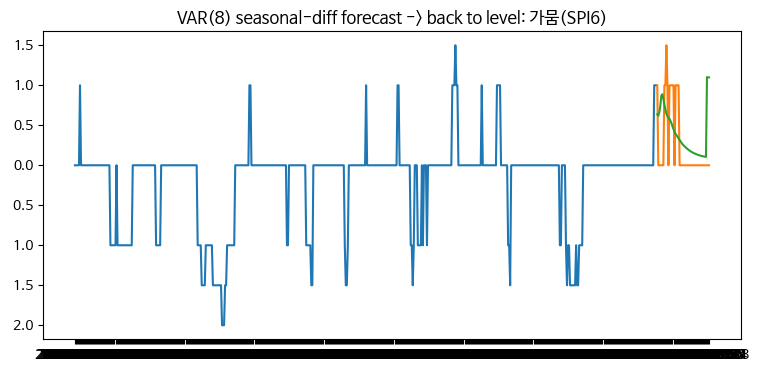

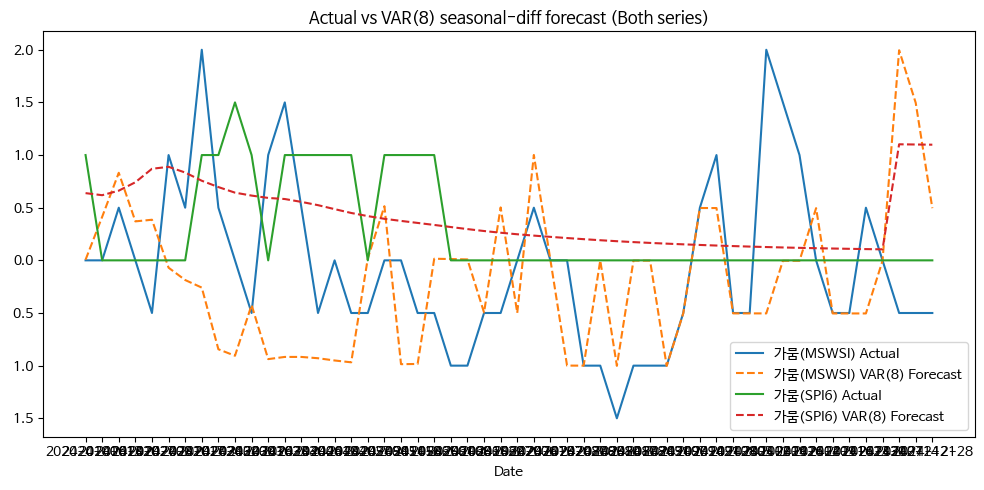

In [ ]:
#VAR모델 p=8 시각화_계절차분
s = 52  # 주기
ytr_sd = (y_train - y_train.shift(s)).dropna()  # 계절차분

res = VAR(ytr_sd).fit(p)
fc_sd = res.forecast(ytr_sd.values[-p:], steps=h)
pred_sd = pd.DataFrame(fc_sd, index=y_test.index, columns=y_test.columns)

# 계절 역변환
y_full = pd.concat([y_train, y_test])
base = y_full.shift(s).loc[y_test.index]        # 시계열 전체를 주기만큼 옮긴다(현재시점이 t+s가 된다)
pred_season_restored = pred_sd.add(base, axis=1)

# 시각화
for col in y_test.columns:
    plt.figure(figsize=(9,4))
    plt.plot(y_train[col])
    plt.plot(y_test[col])
    plt.plot(pred_season_restored[col])
    plt.title(f"VAR(8) seasonal-diff forecast -> back to level: {col}")

#두 변수 함께 비교하는 합쳐진 플롯
plt.figure(figsize=(10,5))
for col in y_test.columns:
    plt.plot(y_test.index, y_test[col],       linestyle='-',  label=f"{col} Actual")
    plt.plot(pred_season_restored.index,   pred_season_restored[col],         linestyle='--', label=f"{col} VAR(8) Forecast")
plt.title("Actual vs VAR(8) seasonal-diff forecast (Both series)")
plt.xlabel("Date"); plt.legend(); plt.tight_layout()
plt.show()



# 4.**VARMAX 모델**
종속변수n개와 독립변수까지

최적 p, q: (3, 0), AIC: 821.3405154119137


                               Statespace Model Results                              
Dep. Variable:     ['가뭄(MSWSI)', '가뭄(SPI6)']   No. Observations:                  573
Model:                               VARX(3)   Log Likelihood                -383.670
                                 + intercept   AIC                            821.341
Date:                       Thu, 25 Sep 2025   BIC                            938.814
Time:                               02:20:29   HQIC                           867.165
Sample:                           01-12-2013                                         
                                - 12-30-2023                                         
Covariance Type:                         opg                                         
Ljung-Box (L1) (Q):             1.09, 0.00   Jarque-Bera (JB):       180.76, 924.38
Prob(Q):                        0.30, 0.97   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.52, 0.98   Skew:        

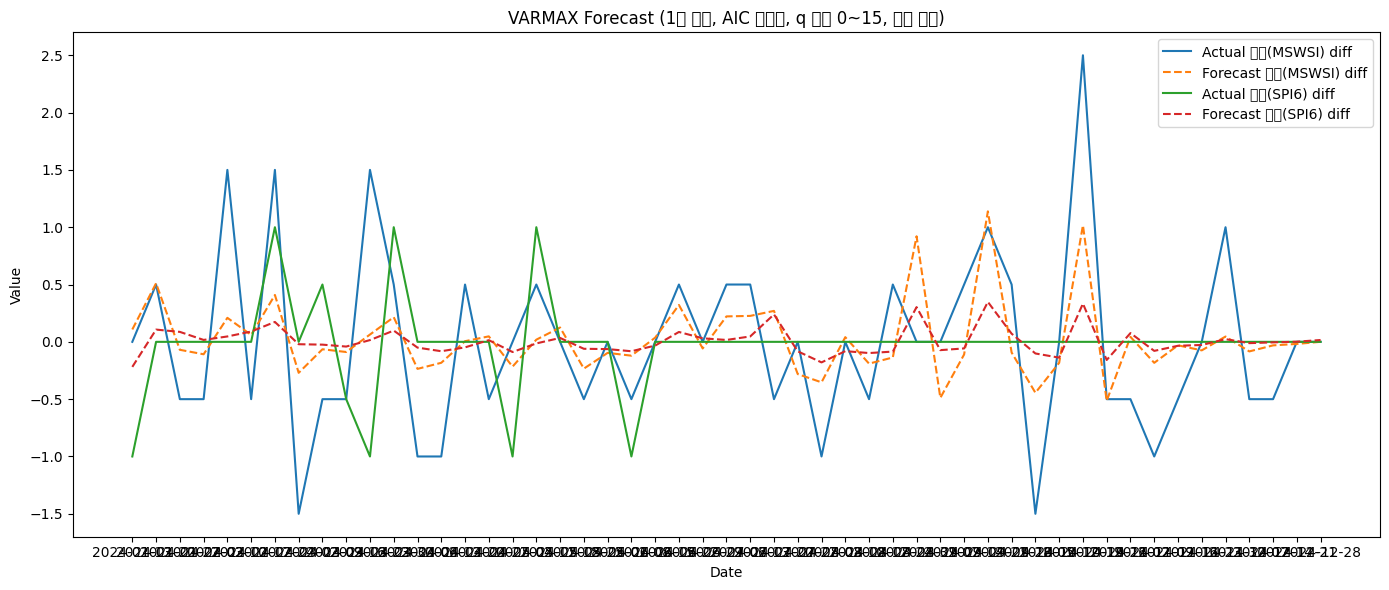

In [ ]:
#VARMAX모델(1차 차분이면서 p,q값 범위안의 중에서 성능이 제일 좋은 모델로 계산)
from statsmodels.tsa.statespace.varmax import VARMAX
import warnings

# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 차분
# -------------------------------
Y_train_diff = y_train[['가뭄(MSWSI)', '가뭄(SPI6)']].diff().dropna()
Y_test_diff = y_test[['가뭄(MSWSI)', '가뭄(SPI6)']].diff().dropna()

# 독립변수 맞춤
X_train_var_adj = X_train.iloc[1:]
X_test_var_adj = X_test.iloc[1:]

# -------------------------------
# p,q 후보 범위 설정
# -------------------------------
p_values = [1, 2, 3]             # AR 차수 후보
q_values = [0, 5, 10, 15]        # MA 차수 후보 (MSWSI/SPI6 기준)

best_aic = float('inf')
best_order = None
best_model = None

# -------------------------------
# p,q 최적화
# -------------------------------
for p in p_values:
    for q in q_values:
        try:
            model = VARMAX(endog=Y_train_diff, exog=X_train_var_adj, order=(p,q))
            model_fitted = model.fit(disp=False)
            if model_fitted.aic < best_aic:
                best_aic = model_fitted.aic
                best_order = (p,q)
                best_model = model_fitted
        except:
            continue

print(f"최적 p, q: {best_order}, AIC: {best_aic}")
print(best_model.summary())

# -------------------------------
# 테스트셋 예측
# -------------------------------
Y_forecast_diff = best_model.forecast(steps=len(Y_test_diff), exog=X_test_var_adj)

# -------------------------------
# 시각화
# -------------------------------
plt.figure(figsize=(14,6))
for col in Y_train_diff.columns:
    plt.plot(Y_test_diff.index, Y_test_diff[col], label=f'Actual {col} diff')
    plt.plot(Y_test_diff.index, Y_forecast_diff[col], label=f'Forecast {col} diff', linestyle='--')

plt.title('VARMAX Forecast (1차 차분, AIC 최적화, q 후보 0~15, 경고 숨김)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#위에서 p,q 조합이 3,0인걸 알면서, 정확도를 보기위해서 다시 계산

# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 준비
# -------------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = ['가뭄(MSWSI)', '가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# -------------------------------
# 1차 차분 (종속변수만)
# -------------------------------
Y_train_diff = y_train.diff().dropna()
Y_test_diff = y_test.diff().dropna()

# 독립변수 인덱스 맞춤
X_train_var_adj = X_train.iloc[1:]
X_test_var_adj = X_test.iloc[1:]

# -------------------------------
# VARMAX 모델 학습 (p=3, q=0)
# -------------------------------
model = VARMAX(endog=Y_train_diff, exog=X_train_var_adj, order=(3,0), enforce_stationarity=True)
fitted = model.fit(disp=False)
print(fitted.summary())

# -------------------------------
# 테스트셋 예측
# -------------------------------
Y_forecast_diff = fitted.forecast(steps=len(Y_test_diff), exog=X_test_var_adj)

# -------------------------------
# 잔차 확인
# -------------------------------
residuals = fitted.resid
residuals.plot(subplots=True, figsize=(12,6), title='잔차 (Residuals)')
plt.tight_layout()
plt.show()

# -------------------------------
# 실제값 vs 예측값 그래프
# -------------------------------
plt.figure(figsize=(14,6))
for col in Y_train_diff.columns:
    plt.plot(Y_test_diff.index, Y_test_diff[col], label=f'Actual {col} diff', marker='o')
    plt.plot(Y_test_diff.index, Y_forecast_diff[col], label=f'Forecast {col} diff', linestyle='--', marker='x')

plt.title('VARMAX Forecast (1차 차분, p=3, q=0)')
plt.xlabel('관측일시')
plt.ylabel('차분값')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 오차/정확도 계산 (RMSE, MAE)
# -------------------------------
for col in Y_test_diff.columns:
    y_true = Y_test_diff[col]
    y_pred = Y_forecast_diff[col]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")


In [ ]:
#2차 차분이면서 p,q조합을 찾고 계산(q값의 범위를 너무 좁게 했음)

# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 준비
# -------------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = ['가뭄(MSWSI)', '가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# -------------------------------
# 2차 차분 (종속변수)
# -------------------------------
Y_train_diff2 = y_train.diff().diff().dropna()
Y_test_diff2 = y_test.diff().diff().dropna()

# 독립변수 인덱스 맞춤
X_train_var_adj2 = X_train.iloc[2:]
X_test_var_adj2 = X_test.iloc[2:]

# -------------------------------
# ACF/PACF 기반 p,q 후보
# -------------------------------
# 이전 분석 기준
# MSWSI: PACF p=2~3, ACF q=10~11
# SPI6: PACF p=2, ACF q=14~15

p_values = [2, 3]                   # AR 차수 후보
q_values = [10, 11, 14, 15]         # MA 차수 후보

best_aic = float('inf')
best_order = None
best_model = None

# -------------------------------
# p,q 최적화
# -------------------------------
for p in p_values:
    for q in q_values:
        try:
            model = VARMAX(endog=Y_train_diff2, exog=X_train_var_adj2, order=(p,q), enforce_stationarity=True)
            fitted = model.fit(disp=False)
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = (p,q)
                best_model = fitted
        except:
            continue

print(f"2차 차분 VARMAX 최적 p, q: {best_order}, AIC: {best_aic}")
print(best_model.summary())

# -------------------------------
# 테스트셋 예측
# -------------------------------
Y_forecast_diff2 = best_model.forecast(steps=len(Y_test_diff2), exog=X_test_var_adj2)

# -------------------------------
# 잔차 확인
# -------------------------------
residuals2 = best_model.resid
residuals2.plot(subplots=True, figsize=(12,6), title='잔차 (Residuals, 2차 차분)')
plt.tight_layout()
plt.show()

# -------------------------------
# 실제값 vs 예측값 그래프
# -------------------------------
plt.figure(figsize=(14,6))
for col in Y_train_diff2.columns:
    plt.plot(Y_test_diff2.index, Y_test_diff2[col], label=f'Actual {col} diff2', marker='o')
    plt.plot(Y_test_diff2.index, Y_forecast_diff2[col], label=f'Forecast {col} diff2', linestyle='--', marker='x')

plt.title('VARMAX Forecast (2차 차분, ACF/PACF 기반 p,q 후보)')
plt.xlabel('관측일시')
plt.ylabel('2차 차분값')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 오차/정확도 계산 (RMSE, MAE)
# -------------------------------
for col in Y_test_diff2.columns:
    y_true = Y_test_diff2[col]
    y_pred = Y_forecast_diff2[col]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} (2차) - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

In [ ]:
#위에 q 범위를 좁게해서 혹시나해서 3,0으로 했는데 성능이 더 좋음, q를 증가시킬떄마다 성능이 안좋아진걸 확안하여서 3,0으로 결정

# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 준비
# -------------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = ['가뭄(MSWSI)', '가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# -------------------------------
# 2차 차분 (종속변수)
# -------------------------------
Y_train_diff2 = y_train.diff().diff().dropna()
Y_test_diff2 = y_test.diff().diff().dropna()

# 독립변수 인덱스 맞춤
X_train_var_adj2 = X_train.iloc[2:]
X_test_var_adj2 = X_test.iloc[2:]

# -------------------------------
# VARMAX 모델 학습 (p=3, q=0 고정)
# -------------------------------
p_fixed, q_fixed = 3, 0
model_fixed = VARMAX(endog=Y_train_diff2, exog=X_train_var_adj2, order=(p_fixed,q_fixed), enforce_stationarity=True)
fitted_fixed = model_fixed.fit(disp=False)

print(f"2차 차분 VARMAX 학습 완료 (p={p_fixed}, q={q_fixed})")
print(fitted_fixed.summary())

# -------------------------------
# 테스트셋 예측
# -------------------------------
Y_forecast_diff2 = fitted_fixed.forecast(steps=len(Y_test_diff2), exog=X_test_var_adj2)

# -------------------------------
# 잔차 확인
# -------------------------------
residuals2 = fitted_fixed.resid
residuals2.plot(subplots=True, figsize=(12,6), title='잔차 (Residuals, 2차 차분, p=3,q=0)')
plt.tight_layout()
plt.show()

# -------------------------------
# 실제값 vs 예측값 그래프
# -------------------------------
plt.figure(figsize=(14,6))
for col in Y_train_diff2.columns:
    plt.plot(Y_test_diff2.index, Y_test_diff2[col], label=f'Actual {col} diff2', marker='o')
    plt.plot(Y_test_diff2.index, Y_forecast_diff2[col], label=f'Forecast {col} diff2', linestyle='--', marker='x')

plt.title('VARMAX Forecast (2차 차분, p=3, q=0)')
plt.xlabel('관측일시')
plt.ylabel('2차 차분값')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 오차/정확도 계산 (RMSE, MAE)
# -------------------------------
for col in Y_test_diff2.columns:
    y_true = Y_test_diff2[col]
    y_pred = Y_forecast_diff2[col]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} (2차, p=3,q=0) - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

In [ ]:
#차분 없는 데이터로 p,q 조합을 찾고 적용
# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 준비
# -------------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = ['가뭄(MSWSI)', '가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# -------------------------------
# p,q 후보군 설정 (예상 범위)
# -------------------------------
p_values = [1, 2, 3]
q_values = [0, 5, 10, 15]

best_aic = float('inf')
best_order = None
best_model = None

# -------------------------------
# p,q 최적화
# -------------------------------
for p in p_values:
    for q in q_values:
        try:
            model = VARMAX(endog=y_train, exog=X_train, order=(p,q), enforce_stationarity=True)
            model_fitted = model.fit(disp=False)
            if model_fitted.aic < best_aic:
                best_aic = model_fitted.aic
                best_order = (p,q)
                best_model = model_fitted
        except:
            continue

print(f"최적 p, q: {best_order}, AIC: {best_aic}")
print(best_model.summary())

# -------------------------------
# 테스트셋 예측
# -------------------------------
Y_forecast = best_model.forecast(steps=len(y_test), exog=X_test)

# -------------------------------
# 실제값 vs 예측값 그래프
# -------------------------------
plt.figure(figsize=(14,6))
for col in y_train.columns:
    plt.plot(y_test.index, y_test[col], label=f'Actual {col}')
    plt.plot(y_test.index, Y_forecast[col], label=f'Forecast {col}', linestyle='--')

plt.title(f'VARMAX Forecast (차분 없음, AIC 최적화)')
plt.xlabel('관측일시')
plt.ylabel('값')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# RMSE, MAE 계산
# -------------------------------
for col in y_test.columns:
    y_true = y_test[col]
    y_pred = Y_forecast[col]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} (차분 없음) - RMSE: {rmse:.4f}, MAE: {mae:.4f}")


In [ ]:
#잔차가 위에 포함이 안되서 p,q가 3,0인건 나와서 다시 계산

# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 준비
# -------------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = ['가뭄(MSWSI)', '가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# -------------------------------
# VARMAX 모델 학습 (차분 없음, p=3, q=0)
# -------------------------------
p_fixed, q_fixed = 3, 0
model_nodiff = VARMAX(endog=y_train, exog=X_train, order=(p_fixed,q_fixed), enforce_stationarity=True)
fitted_nodiff = model_nodiff.fit(disp=False)

print(f"차분 없는 VARMAX 학습 완료 (p={p_fixed}, q={q_fixed})")
print(fitted_nodiff.summary())

# -------------------------------
# 테스트셋 예측
# -------------------------------
Y_forecast = fitted_nodiff.forecast(steps=len(y_test), exog=X_test)

# -------------------------------
# 잔차 확인
# -------------------------------
residuals = fitted_nodiff.resid
residuals.plot(subplots=True, figsize=(12,6), title='잔차 (Residuals, 차분 없음, p=3,q=0)')
plt.tight_layout()
plt.show()

# -------------------------------
# 실제값 vs 예측값 그래프
# -------------------------------
plt.figure(figsize=(14,6))
for col in y_train.columns:
    plt.plot(y_test.index, y_test[col], label=f'Actual {col}', marker='o')
    plt.plot(y_test.index, Y_forecast[col], label=f'Forecast {col}', linestyle='--', marker='x')

plt.title('VARMAX Forecast (차분 없음, p=3, q=0)')
plt.xlabel('관측일시')
plt.ylabel('값')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 오차/정확도 계산 (RMSE, MAE)
# -------------------------------
for col in y_test.columns:
    y_true = y_test[col]
    y_pred = Y_forecast[col]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} (차분 없음, p=3,q=0) - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

In [ ]:
#0.5 단위로 된 범주형 데이터라 0.5반올림 시 어떻게 될지 실험 (별로 안좋은걸로..)

# -------------------------------
# 경고 메시지 숨기기
# -------------------------------
warnings.filterwarnings("ignore")

# -------------------------------
# 데이터 준비
# -------------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = ['가뭄(MSWSI)', '가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# -------------------------------
# 1차 차분 (종속변수만)
# -------------------------------
Y_train_diff = y_train.diff().dropna()
Y_test_diff = y_test.diff().dropna()

# 독립변수 인덱스 맞춤
X_train_var_adj = X_train.iloc[1:]
X_test_var_adj = X_test.iloc[1:]

# -------------------------------
# VARMAX 모델 학습 (p=3, q=0)
# -------------------------------
model = VARMAX(endog=Y_train_diff, exog=X_train_var_adj, order=(3,0), enforce_stationarity=True)
fitted = model.fit(disp=False)
print(fitted.summary())

# -------------------------------
# 테스트셋 예측 (차분값)
# -------------------------------
Y_forecast_diff = fitted.forecast(steps=len(X_test_var_adj), exog=X_test_var_adj)

# -------------------------------
# 차분값 0.5 단위 반올림
# -------------------------------
Y_forecast_diff_rounded = np.round(Y_forecast_diff * 2) / 2

# -------------------------------
# 길이 문제 해결
# -------------------------------
# 1차 차분 때문에 첫 번째 테스트 값은 예측 불가
Y_forecast_diff_rounded.index = Y_test_diff.index
y_test_diff_eval = Y_test_diff.copy()

# -------------------------------
# 그래프
# -------------------------------
plt.figure(figsize=(14,6))
for col in target:
    plt.plot(y_test_diff_eval.index, y_test_diff_eval[col], label=f'Actual {col} diff', marker='o')
    plt.plot(Y_forecast_diff_rounded.index, Y_forecast_diff_rounded[col], label=f'Forecast {col} diff rounded', linestyle='--', marker='x')

plt.title('VARMAX Forecast (1차 차분, Rounded to 0.5)')
plt.xlabel('관측일시')
plt.ylabel('차분값')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# RMSE / MAE 계산
# -------------------------------
for col in target:
    y_true = y_test_diff_eval[col]
    y_pred = Y_forecast_diff_rounded[col]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} diff - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

**VARMAX주석**

주간 데이터라서 p값이 3이 적당한 정도라고함 3주 정보를 반영하여 예측한다는 뜻

차분한 예측을 원상복귀 시켜봤는데 2보다 넘는 그러니까 2.5인 데이터가 발견되었음

그런 데이터를 2로 볼지 아니면 따로 해결방안을 찾아야할듯

사실 spi6나 mswsi 둘다 수치형이었으면 이런 문제는 없었겠지만.. 범주형으로 만든 숫자형 데이터라서 생기는 문제

전체적으로 봤을 때 spi6을 예측하는 건 그다지 좋아보이지 않음 성능이 mswsi보다는 좋게 나오지만 24년 데이터 특성상 0인 데이터가 많아서 예측이 쉬워서 잘 나온거 일수도 있음 후에 년도를 달리해서 예측해보면 달라질 수 있음

시각적으로 봤을 때는 mswsi가 그나마 형태를 따라가면서 예측이 잘 되는거 같음

문제는 아까도 말한 수치적인 문제인데 이정도면 그냥 양수이면 가뭄이다. 음수이면 가뭄이 아니다로 나눠서 생각해야 할지도 모름